# Gesichtserkennung

In diesem Beispiel zur Gesichtserkennung geht es um die sogenannte 'Viola-Jones-Methode', auch bekannt als 'Haar Cascades'.
Das Training dieses Algorithmus erfolgt durch eine große Anzahl an Bildern. Der Trainingssatz besteht zum einen aus Bildern mit Gesichtern (positive Bilder) darauf und aus Bildern auf denen keine Gesichter abgebildet sind (negative Bilder).


### Theorie

Zunächst soll die Funktionsweise dieser Methode in der Theorie erläutert werden.

##### Haar features

![title](Bilder/Haar-Features.png)
Auf diesem Bild sind Beispiele für 'Haar features' zu sehen. Mit diesen Features ist es einfach Kanten und Linien in Bildern zu finden.

Die Berechnung eines solchen Features könnte folgendermaßen aussehen:
![title](Bilder/Berechnung%20Feature.png)

Die linke Abbildung zeigt ein Beispielbild mit Pixelwerten zwischen 0.0 und 1.0. Von einem rechteckigen Bereich des Bildes soll der 'Haar value'
errechnet werden. Der Haar-Kernel hat alle hellen Pixel auf der linken Seite mit dem Wert 0 und alle dunklen Pixel auf der rechten Seite mit dem Wert 1.
Für die Berechnung wird die Differenz der durchschnittlichen Pixelwerte beider Seiten gebildet. Liegt das Ergebnis nahe bei 1, wird eine Kante vom Haar
 feature erkannt. Im Beispielbild ist dies also nicht der Fall.

Damit eine Kante erkannt wird muss ein bestimmtes Feature über das gesamte Bild wandern. Dies geschieht von links oben nach rechts unten, wobei alle
möglichen Größen des Features angewendet werden.

![Haar Cascade Visualization](https://miro.medium.com/v2/resize:fit:720/1*BpHwuCr9q9eldVKzUcFkwA.gif)


##### Integralbilder

Bei herkömmlichen Bildern erfordert das Wandern der Haar features viele mathematische Berechnungen. Um diese zu vereinfachen, werden Integralbilder verwendet.
<br/>
<div>
<img src="Bilder/Integralbild Beispiel.png" width="1000"/>
</div>

Bei einem Integralbild ist der Wert eines Pixels die Summe der Werte alle Pixel die links davon und darüber liegen.
Durch dieses Vorgehen werden nur noch 4 Werte, aus den Ecken des zu berechnenden Bereichs, benötigt um den Durchschnittswert der Pixel in einem bestimmten Bereich zu ermitteln.
Folgendes Bild zeigt, wie sich dies im vorherigen Beispiel bei unserem Haar feature verhalten würde:
<br/>
<div>
<img src="Bilder/Integralbild Berechnungen.png" width="1250"/>
</div>



##### Adaboost

Da bereits in einem 24x24 Fenster mehr als 180.000 feature values generiert werden, ist es sinnvoll sich auf die Features zu konzentrieren die für die Gesichtserkennung relevant sind. Aus diesem Grund wird der Algorithmus 'Adaboost' verwendet. Aus der enormen Menge an Feature wählt er nur diejenigen mit der geringsten Fehlerquote. Durch dieses Verfahren kann die Anzahl der Features von ca. 180.000 auf ca. 6.000 reduziert werden.

##### Attentional Cascade

Nachdem mit 'Adaboost' bereits Features aussortiert wurden, müssten nun ca 6.000 davon über alle Trainigsbilder laufen, was immernoch viel Aufwand wäre.
Durch 'Attentional Cascade' soll dieser Vorgang vereinfacht werden. Die Idee hierbei ist es, nicht alle Features alle Fenster eines Bilder durchlaufen zu lassen. Bei dieser Technik werden die Features in verschiedenen Phasen angewandt. In den Anfangsphase werden wenige und einfache Features verwendet. Komplexität und Anzahl der verwendeten Features steigen mit jeder Phase an.
 Wird bereits zu Beginn in einem Fenster nichts erkannt, wird dieses Fenster verworfen und muss somit in den darauf folgenden Phasen nicht erneut verarbeitet werden.

Abschließend noch eine Animation die das Vorgehen dieser Methode verdeutlichen soll.
![Haar Cascade Visualization](Bilder/Haar-Cascade.gif)

Es ist erkennbar, dass anfangs, in den Bereichen ohne Gesicht weniger Features angewandt werden und erst in dem Bereich der das Gesicht enthält, in die nächste Phase übergegangen wird.

### Beispiel

In [8]:
# Importieren der Bibliotheken
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

##### Laden der Bilder



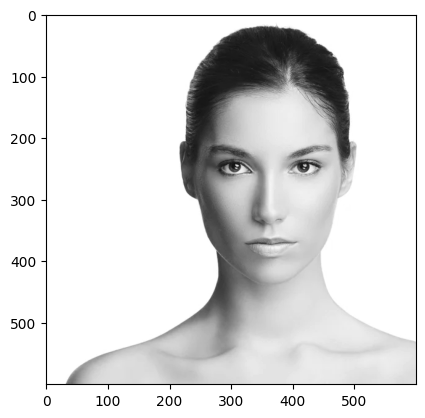

In [9]:
#  Zu testendes Bild laden
test_image = cv2.imread('data/depositphotos_25349029-stock-photo-perfect-skin.jpg')

# Konvertierung zu einem Graustufenbild für opencv
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Anzeigen des Graustufenbildes
plt.imshow(test_image_gray, cmap='gray')

OpenCV läd Bilder im BGR-format. Um die normalen Farben anzuzeigen müssen wir das Bild in das RBG-Format konvertieren.

In [10]:
# Funktion für die Konvertierung
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

##### Haar cascade files

OpenCV bietet viele pre-trained Klassifikatoren an. Zu finden sind sie unter `opencv/data/haarcascades/`. Für dieses Beispiel sind sie zusätzlich unter 'data/haarcascades' hinterlegt.

##### Laden des Klassifikators für frontale Gesichtserkennung

In [11]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_alt2.xml')


##### Gesichtserkennung

Verwendet wird das 'dectMultiscale' Modul des Klassifikators. Ausgegeben werden die Koordinaten des erkannten Gesichts (x- und y-Position mit Höhe und Breite) als Rect(x,y,w,h).

In [12]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

print('Gesichter gefunden: ', len(faces_rects))

Gesichter gefunden:  1


In [13]:
# Zeichnen des Rechtecks (Farbe: Grün, Dicke: 2)
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

Finally, we shall display the original image in coloured to see if the face has been detected correctly or not.

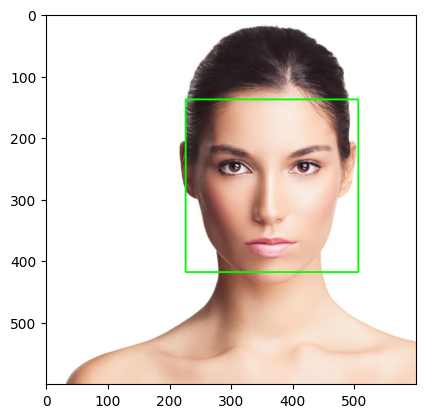

In [14]:
# Anzeigen des Originalbildes
plt.imshow(convertToRGB(test_image))

##### Generelle Funktion für den Prozess der Gesichtserkennung

In [1]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # Kopie des Originalbildes erstellen um das Original zu schützen
    image_copy = test_image.copy()

    # Konvertierung zu einem Graustufenbild (für OpenCV face detector benötigt)
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Anwenden der Haar-Klassifikatoren
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)
        
    return image_copy

### Funktionstest an einem neuen Bild




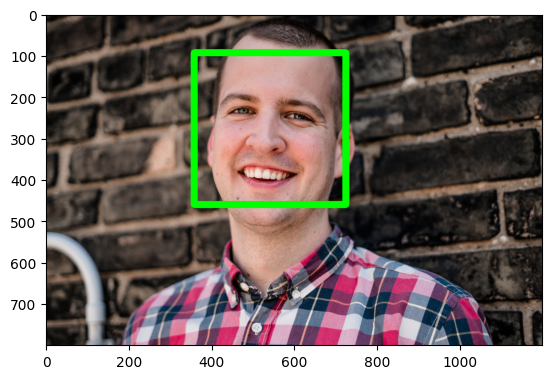

In [16]:
# Bild laden
test_image2 = cv2.imread('data/portrait-young-man-smiling.jpg')

# Aufrufen der Funktion
faces = detect_faces(haar_cascade_face, test_image2)

# Konvertierung zurück zu RGB + Anzeige des Bildes
plt.imshow(convertToRGB(faces))


### Testing the function on a group photograph

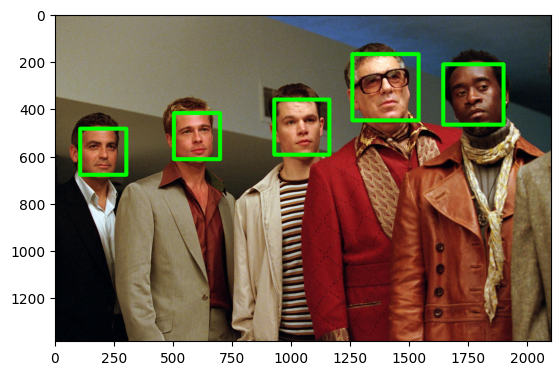

In [17]:
# Bild laden
test_image2 = cv2.imread('data/Oceans-Eleven.jpg')

#Aufrufen der Funktion
faces = detect_faces(haar_cascade_face, test_image2)

# Konvertierung zurück zu RGB + Anzeige des Bildes
plt.imshow(convertToRGB(faces))


### Saving the Image

In [18]:
 cv2.imwrite('image1.png',faces)

True

Quellen:
https://www.datacamp.com/tutorial/face-detection-python-opencv
https://towardsdatascience.com/face-detection-with-haar-cascade-727f68dafd08